MNIST DATA 불러오기

In [10]:
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines() #파일의 모든 행을 읽기
data_file.close()

Data 시각화 : 구분자로 쉼표를 이용해 긴 텍스트 문자열을 개별 값으로 분리
레이블 값인 첫 번째 값은 무시하고 나머지 28*28=784의 값을 추출한 후, 이를 28*28 행렬로 표현

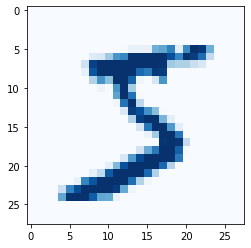

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28)) #문자열을 실수로 변환한 후 배열(28*28) 생성
plt.imshow(image_array, cmap='Blues', interpolation='None') #행렬 시각화

MNIST 학습 데이터 준비하기 : 데이터 값의 범위 재조정 -> 활성화 함수의 수용 범위 안에 데이터가 있어야
신경망의 효율 증가

In [12]:
#0~255 사이의 입력 색상 값들의 범위를 0.01~1.0 사이에 속하도록 조정
scaled_input = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [13]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

신경망 코드

In [22]:
import numpy as np
import scipy.special

class neuralNetwork():
    #신경망 초기화
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        
        #가중치
        self.wih = np.random.normal(0.0, pow(self.hnodes, - 0.5),(self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #activation function
        self.activation_function = lambda x : scipy.special.expit(x) #expit함수는 sigmoid 함수
        
        pass
    
    #신경망 학습
    def train(self, inputs_list, targets_list):
        #입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs  #출력층의 오차 계산
        hidden_errors = np.dot(self.who.T, output_errors)  #은닉층의 역전파된 오차 계산
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #신경망 질의
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T #입력리스트를 2차원행렬로 변환
        hidden_inputs = np.dot(self.wih, inputs) #은닉층으로 들어오는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)  #은닉층에서 나가는 신호 계산
        final_inputs = np.dot(self.who, hidden_outputs)  #출력층으로 들어오는 신호 계산
        final_outputs = self.activation_function(final_inputs)   #출력층에서 나가는 신호 계산
        return final_outputs
    
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.2

N = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

100개의 레코드를 가진 toy data를 불러와서 학습

In [23]:
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines() #파일의 모든 행을 읽기
data_file.close()

for record in data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    N.train(inputs, targets)
    pass

신경망 테스트하기

array([[1.53639959e-02],
       [1.91360876e-03],
       [1.00235176e-02],
       [8.76596434e-03],
       [7.65933476e-03],
       [2.73923181e-02],
       [3.57975761e-04],
       [9.85310810e-01],
       [3.57288821e-02],
       [7.68256899e-03]])

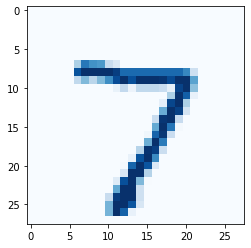

In [24]:
test_data_file = open("mnist_test_10.csv", 'r', encoding='utf8')
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Blues', interpolation = 'None')

N.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

전체 데이터를 이용해 학습 및 테스트하기

In [25]:
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [26]:
scorecard = []   #신경망의 성능 지표가 되는 성적표 초기화
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = N.query(inputs)
    label = np.argmax(outputs)  #행렬 내 가장 큰 값을 찾아 위치를 알려줌
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.623


learning rate, 주기, 은닉 노드 수 변경을 통한 신경망 개선

In [19]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.5

M = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
epochs = 7  #주기 : 학습데이터가 학습을 위해 이용되는 횟수

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        M.train(inputs, targets)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.601
